## LSTM Experiment
Insert Code wherever represented with "#***************#"

In [2]:
#pip install keras-preprocessing


  Obtaining dependency information for keras-preprocessing from https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
top_words = 5000
"""
    Load the IMDB Movie Review dataset and train them into train and split from imdb.load_dataset
    Also mention the num_words parameter as top_words
"""
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to ensure they have the same length
max_review_length = 500  # You can adjust this value depending on your preference
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)
#********************#

17464789/17464789 [==============================] - 3s 0us/step


In [5]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [11]:
# truncate and/or pad input sequences
max_review_length = 400
"""
    Apply padding to both X_train and x_test variables with above mentioned max_review_length
"""
# Pad the sequences to ensure they have a fixed length of 400
X_train = pad_sequences(X_train, maxlen=400)
X_test = pad_sequences(X_test, maxlen=400)

print(X_train[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Create the model

embedding_vector_length = 32

"""
    Create LSTM Model using following Layers:
    1. Embedding Layer
    2. LSTM with 10 neurons
    3. Dense Layer with sigmoid activation for Output
"""
model = Sequential()

# Add the layers to the model
model.add(Embedding(input_dim=16000, output_dim=embedding_vector_length, input_length=400))  # Embedding Layer
model.add(LSTM(10))  # LSTM Layer with 10 neurons
model.add(Dense(1, activation='sigmoid'))  # Dense Layer with sigmoid activation for output


In [13]:
"""
    Compile the model using following criteria:
    compile(loss, optimizer, metrics=['accuracy'])
"""
#********************#
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           512000    
                                                                 
 lstm_1 (LSTM)               (None, 10)                1720      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 513731 (1.96 MB)
Trainable params: 513731 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

"""
    Print Accuracy acheived by model using the above created scores variable
"""
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/10
98/98 [==============================] - 9s 94ms/step - loss: 0.1403 - accuracy: 0.9554 - val_loss: 0.3853 - val_accuracy: 0.8627
Epoch 2/10
98/98 [==============================] - 9s 95ms/step - loss: 0.1325 - accuracy: 0.9578 - val_loss: 0.4003 - val_accuracy: 0.8654
Epoch 3/10
98/98 [==============================] - 9s 95ms/step - loss: 0.1281 - accuracy: 0.9596 - val_loss: 0.3862 - val_accuracy: 0.8640
Epoch 4/10
98/98 [==============================] - 9s 96ms/step - loss: 0.1239 - accuracy: 0.9620 - val_loss: 0.4148 - val_accuracy: 0.8642
Epoch 5/10
98/98 [==============================] - 9s 96ms/step - loss: 0.1044 - accuracy: 0.9694 - val_loss: 0.4311 - val_accuracy: 0.8630
Epoch 6/10
98/98 [==============================] - 9s 95ms/step - loss: 0.1020 - accuracy: 0.9700 - val_loss: 0.4500 - val_accuracy: 0.8612
Epoch 7/10
98/98 [==============================] - 9s 96ms/step - loss: 0.1151 - accuracy: 0.9647 - val_loss: 0.4300 - val_accuracy: 0.8638
Epoch 8/10
98

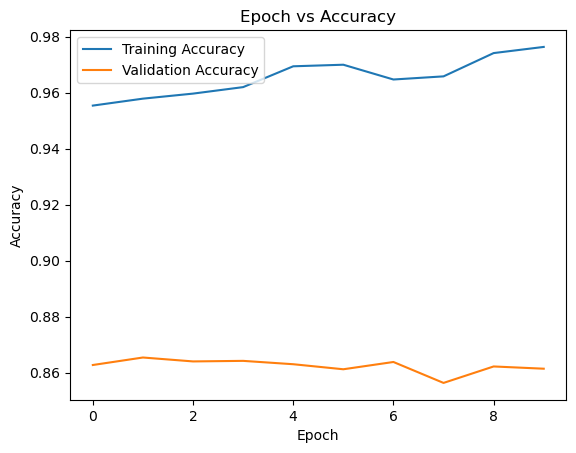

In [16]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs Accuracy
"""
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


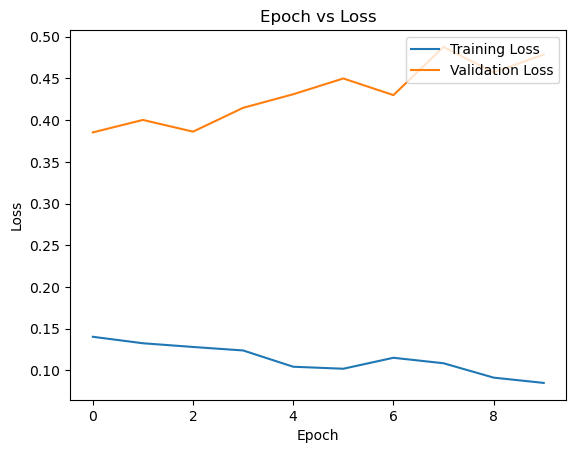

In [17]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs loss
"""
# Plot graph between epoch vs loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [18]:
pred=model.predict(X_test)
print(pred)

782/782 [==============================] - 6s 7ms/step
[[0.03565692]
 [0.9974325 ]
 [0.96540505]
 ...
 [0.00903539]
 [0.01728015]
 [0.97229445]]
